In [ ]:
# Import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import random
import os

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read the data
# df = pd.read_csv("datasets/breastcancer.csv")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/01-MachineLearning/datasets/breastcancer.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 33)

In [ ]:
df = df.drop("Unnamed: 32", axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
dff = df.copy(deep=True) # copy the dataframe
for x in df.columns: # iterate over the columns
    if dff[x].dtype == 'float64': # if the column has type `float64`
        dff[x] = dff[x].astype('float32') # ... change it to `float32`
dff.info() # show some statistics on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float32
 3   texture_mean             569 non-null    float32
 4   perimeter_mean           569 non-null    float32
 5   area_mean                569 non-null    float32
 6   smoothness_mean          569 non-null    float32
 7   compactness_mean         569 non-null    float32
 8   concavity_mean           569 non-null    float32
 9   concave points_mean      569 non-null    float32
 10  symmetry_mean            569 non-null    float32
 11  fractal_dimension_mean   569 non-null    float32
 12  radius_se                569 non-null    float32
 13  texture_se               569 non-null    float32
 14  perimeter_se             5

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(df[["diagnosis"]])


In [ ]:
y = pd.get_dummies(df["diagnosis"], prefix='siagnosis')
y

df1 = pd.concat([dff, y], axis=1);

In [ ]:
df1 = df1.drop("siagnosis_M", axis=1)
df1 = df1.drop("id", axis=1)


In [ ]:
df1 = df1.drop("diagnosis", axis=1)

In [ ]:
df1.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'siagnosis_B'],
      dtype='object')

In [ ]:
list = {'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'}

In [ ]:
df1 = df1.drop(list, axis=1)

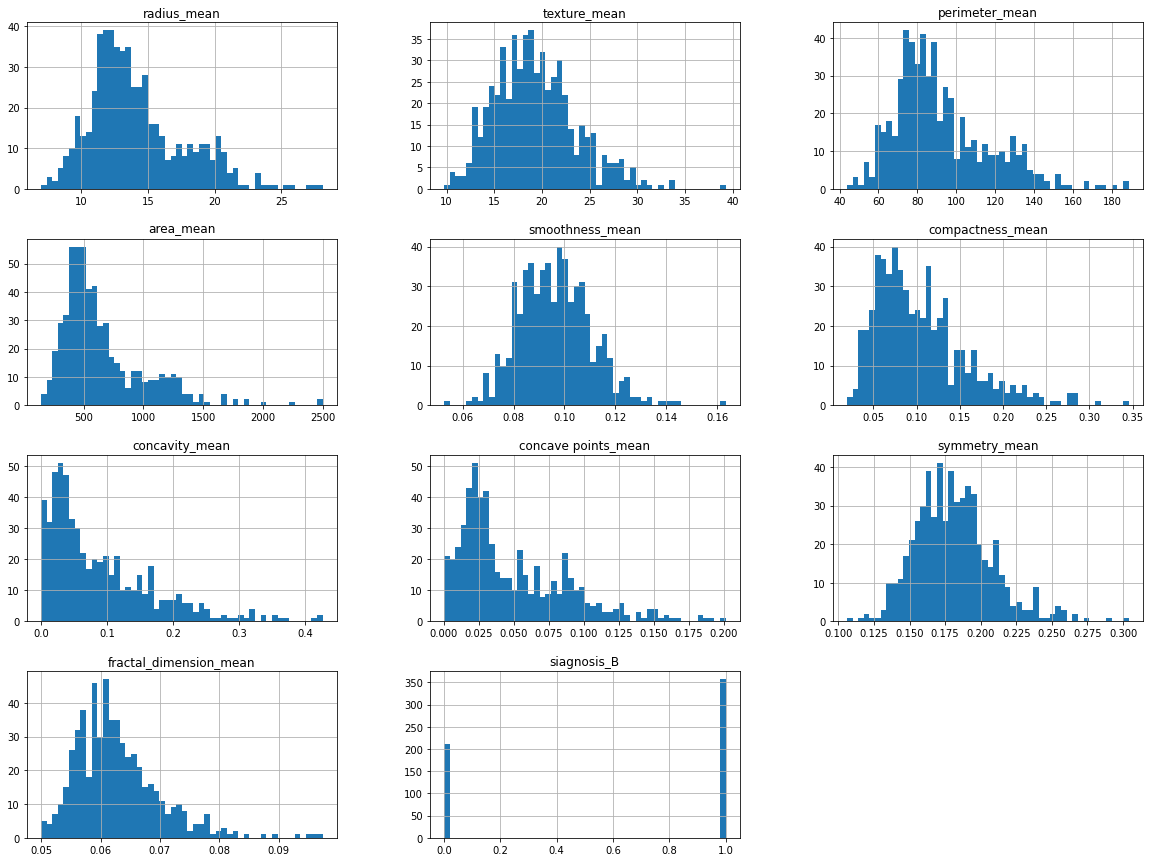

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15))
plt.show()

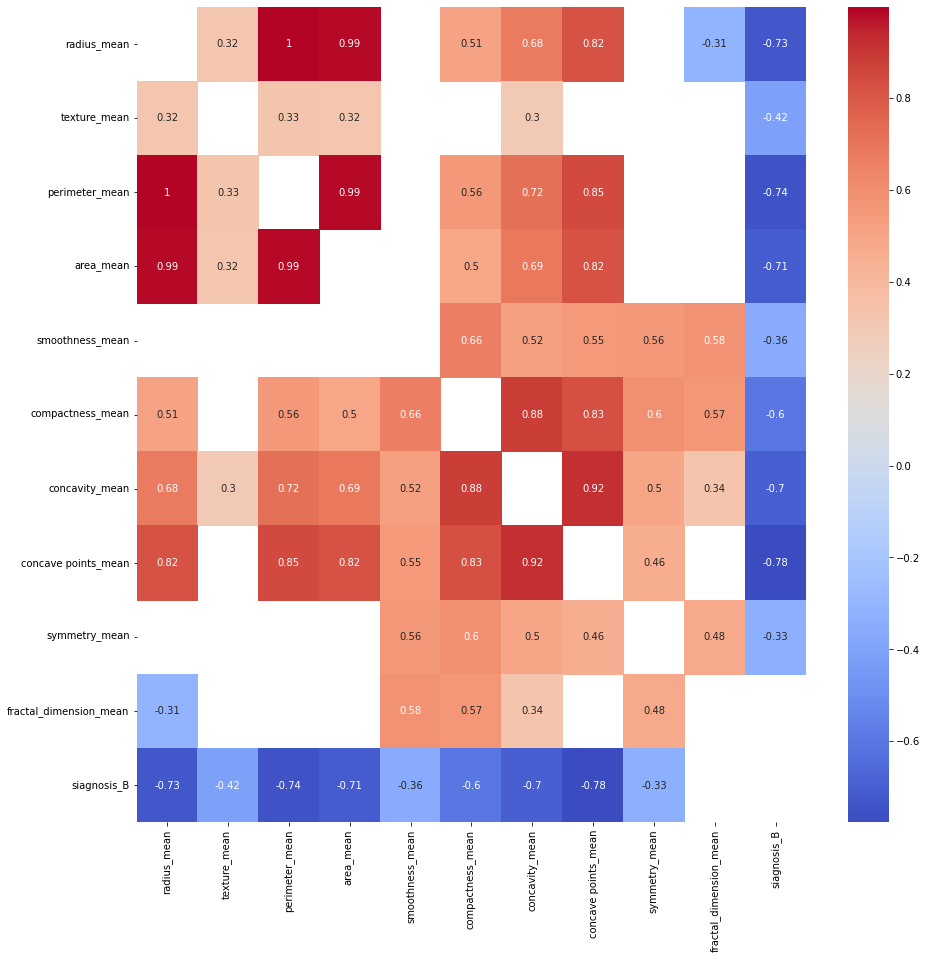

In [ ]:
from scipy.stats import pearsonr
rho = df1.corr(method ='pearson')
pval = df1.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(15, 15))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True) 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float32
 1   texture_mean            569 non-null    float32
 2   perimeter_mean          569 non-null    float32
 3   area_mean               569 non-null    float32
 4   smoothness_mean         569 non-null    float32
 5   compactness_mean        569 non-null    float32
 6   concavity_mean          569 non-null    float32
 7   concave points_mean     569 non-null    float32
 8   symmetry_mean           569 non-null    float32
 9   fractal_dimension_mean  569 non-null    float32
 10  siagnosis_B             569 non-null    uint8  
dtypes: float32(10), uint8(1)
memory usage: 22.9 KB


In [ ]:
normalized_df=(df1-df1.min())/(df1.max()-df1.min())

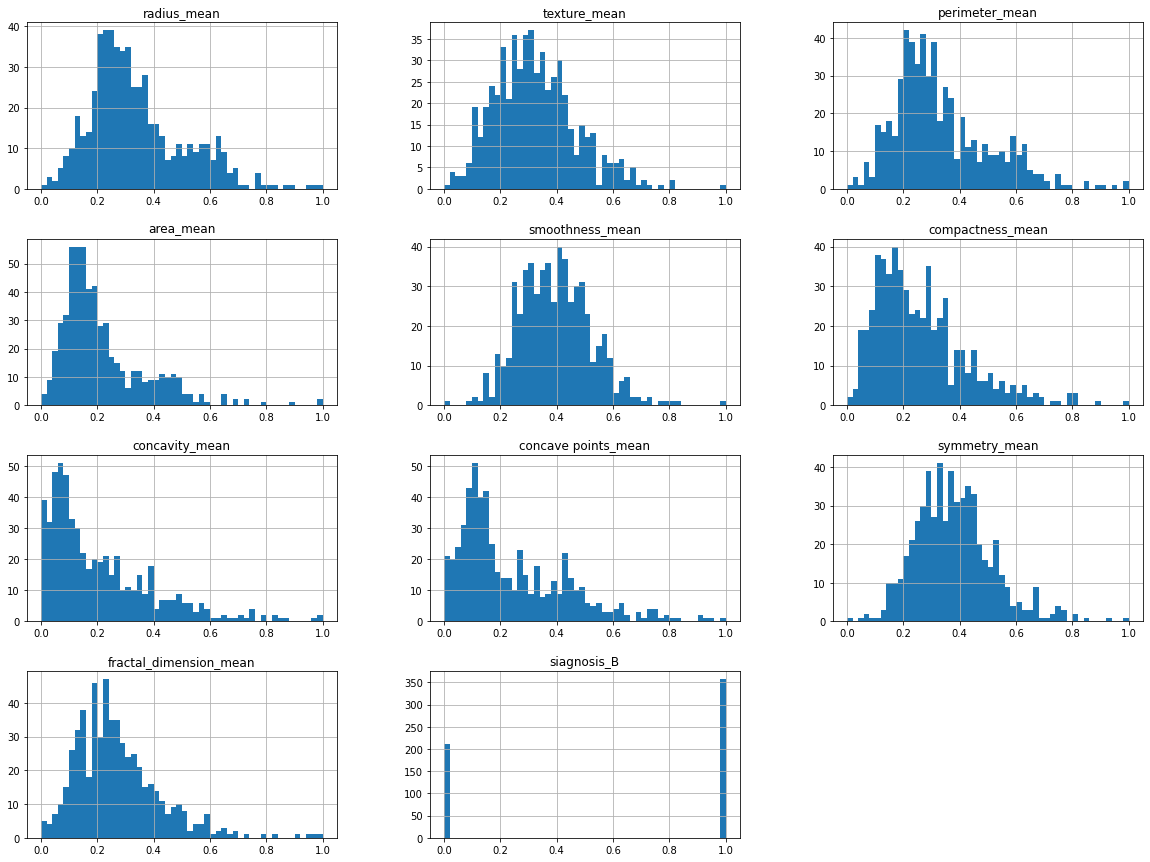

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
normalized_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
X = normalized_df.drop(['siagnosis_B'], axis = 1) # drop the class column
y = normalized_df['siagnosis_B'] # Class only

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 398 samples in the training dataset
There are 171 samples in the testing dataset
Each sample has 10 features


In [ ]:
from sklearn import tree
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42)
estimator.fit(X_train, y_train);

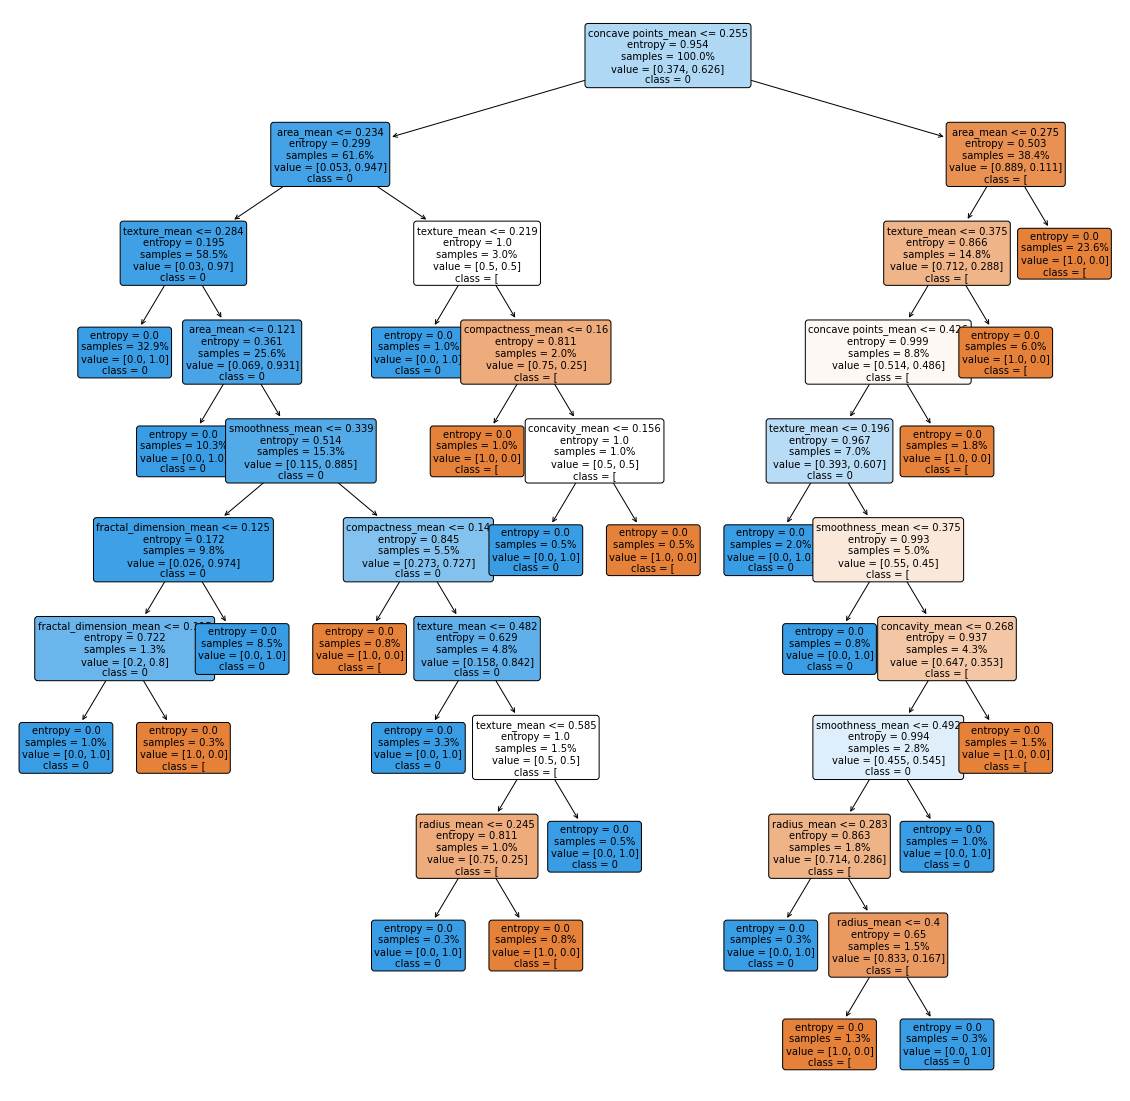

In [ ]:
plt.figure(figsize = (20,20), 
#           dpi = 500, # this increments the detail, to do a more detiled inspection
          )
tree.plot_tree(estimator
          , filled=True
          , feature_names = X.columns
          , class_names = str(estimator.classes_)
          , rounded = True
          , proportion = True
          , fontsize = 10
         # limited view, since the full tree is very complex
              );

In [ ]:
from sklearn.metrics import accuracy_score
y_predicted_test = estimator.predict(X_test)
accuracy_ho = accuracy_score(y_test, y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_ho))

The accuracy on test set is 93.0%


In [ ]:
# lets Make a function for Grid Search CV
def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=2)
    clf.fit(X_train, y_train)
    print("The best parameters are:")
    print(clf.best_params_)
    print("The best estimator is " + str(clf.best_estimator_))
    print("The best score is " + str(clf.best_score_))

In [ ]:
model = KNeighborsClassifier()

k_range = list(range(1, 30, 3))
leaf_size = list(range(1, 30, 3))
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size} #, 'weights': ['uniform', 'distance']}

gridsearch_cv(model, param_grid, X, y)

NameError: ignored